In [29]:
#imports and file path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
file_path = r"D:\Project AxionRay\DA -Task 2..xlsx"   


In [60]:

df = pd.read_excel(file_path, sheet_name=0, dtype=str)
print("Rows:", df.shape[0], "Cols:", df.shape[1])
df.info()


Rows: 100 Cols: 52
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   VIN                            100 non-null    object
 1   TRANSACTION_ID                 100 non-null    object
 2   CORRECTION_VERBATIM            100 non-null    object
 3   CUSTOMER_VERBATIM              100 non-null    object
 4   REPAIR_DATE                    100 non-null    object
 5   CAUSAL_PART_NM                 95 non-null     object
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object
 7   PLATFORM                       100 non-null    object
 8   BODY_STYLE                     100 non-null    object
 9   VPPC                           100 non-null    object
 10  PLANT                          99 non-null     object
 11  BUILD_COUNTRY                  100 non-null    object
 12  LAST_KNOWN_DLR_NAME            100 non-null   

In [80]:
# Convert columns to proper types
numeric_cols = ['KM', 'REPAIR_AGE', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'], errors='coerce')


In [62]:
df.dtypes

VIN                                      object
TRANSACTION_ID                           object
CORRECTION_VERBATIM                      object
CUSTOMER_VERBATIM                        object
REPAIR_DATE                      datetime64[ns]
CAUSAL_PART_NM                           object
GLOBAL_LABOR_CODE_DESCRIPTION            object
PLATFORM                                 object
BODY_STYLE                               object
VPPC                                     object
PLANT                                    object
BUILD_COUNTRY                            object
LAST_KNOWN_DLR_NAME                      object
LAST_KNOWN_DLR_CITY                      object
REPAIRING_DEALER_CODE                    object
DEALER_NAME                              object
REPAIR_DLR_CITY                          object
STATE                                    object
DEALER_REGION                            object
REPAIR_DLR_POSTAL_CD                     object
REPAIR_AGE                              

In [81]:
# Unique values per column
for col in df.columns:
    unique_count = df[col].nunique(dropna=True)
    print(f"{col}: {unique_count} unique values")


VIN: 98 unique values
TRANSACTION_ID: 32 unique values
CORRECTION_VERBATIM: 93 unique values
CUSTOMER_VERBATIM: 100 unique values
REPAIR_DATE: 29 unique values
CAUSAL_PART_NM: 19 unique values
GLOBAL_LABOR_CODE_DESCRIPTION: 4 unique values
PLATFORM: 11 unique values
BODY_STYLE: 6 unique values
VPPC: 26 unique values
PLANT: 12 unique values
BUILD_COUNTRY: 3 unique values
LAST_KNOWN_DLR_NAME: 100 unique values
LAST_KNOWN_DLR_CITY: 94 unique values
REPAIRING_DEALER_CODE: 95 unique values
DEALER_NAME: 100 unique values
REPAIR_DLR_CITY: 93 unique values
STATE: 40 unique values
DEALER_REGION: 2 unique values
REPAIR_DLR_POSTAL_CD: 93 unique values
REPAIR_AGE: 35 unique values
KM: 100 unique values
COMPLAINT_CD_CSI: 1 unique values
COMPLAINT_CD: 7 unique values
VEH_TEST_GRP: 24 unique values
COUNTRY_SALE_ISO: 6 unique values
ORD_SELLING_SRC_CD: 7 unique values
OPTN_FAMLY_CERTIFICATION: 4 unique values
OPTF_FAMLY_EMISSIOF_SYSTEM: 9 unique values
GLOBAL_LABOR_CODE: 4 unique values
TRANSACTION_CA

In [64]:
df[numeric_cols].describe()

,KM,REPAIR_AGE,REPORTING_COST,TOTALCOST,LBRCOST
count,100.000000,100.000000,100.000000,94.000000,100.000000
mean,24914.230000,14.940000,531.193200,561.162128,106.344900
std,20747.078206,12.367945,411.161608,452.796836,113.223074
min,3.000000,0.000000,27.690000,27.690000,20.000000
25%,8883.250000,5.000000,305.432500,320.105000,61.855000
50%,21962.000000,12.000000,433.970000,457.225000,78.560000
75%,35493.250000,21.000000,554.062500,606.905000,108.055000
max,107905.000000,50.000000,2457.450000,3205.450000,1012.670000


The dataset contains detailed information about vehicle repairs, parts replaced, customer complaints, and associated costs. Each column provides actionable insights for stakeholders:

- VIN / TRANSACTION_ID: Enables traceability of each repair and transaction for auditing and quality control purposes. Stakeholders can track specific vehicles and understand recurring issues.

- COMPLAINT_CD / CUSTOMER_VERBATIM: Highlights customer-reported issues and helps identify the most frequent complaints, guiding preventive maintenance and design improvements.

- CORRECTION_VERBATIM / CAUSAL_PART_NM / GLOBAL_LABOR_CODE_DESCRIPTION: Provides insight into corrective actions, replaced parts, and labor activities. This helps service managers assess repair efficiency and part performance.

- REPAIR_DATE / REPAIR_AGE / KM: Shows repair timing relative to vehicle usage, enabling stakeholders to understand patterns in failures and plan warranty or maintenance schedules.

- DEALER_NAME / REPAIR_DLR_CITY / STATE / DEALER_REGION: Indicates dealer or regional performance and common issues across locations, helping identify training needs or quality concerns.

- TOTALCOST / REPORTING_COST / LBRCOST: Tracks the financial impact of repairs. Stakeholders can prioritize costly issues and evaluate cost-effectiveness of parts and labor.

- PLATFORM / BODY_STYLE / ENGINE / TRANSMISSION: Provides context for which vehicle types or configurations are prone to certain failures, guiding design improvements and service planning.

- COUNTRY_SALE_ISO / SALES_REGION_CODE / ORD_SELLING_SRC_CD: Supports market-level analysis of vehicle issues and repair trends, informing supply chain and regional service strategies.

In [82]:
# total missing values per column
missing_values = df.isnull().sum()
print(missing_values)


VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     0
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              0
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              0
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               0
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       0
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [83]:
# Categorical columns with few missing values
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].fillna('Unknown')
df['PLANT'] = df['PLANT'].fillna('Unknown')
df['STATE'] = df['STATE'].fillna('Unknown')
df['REPAIR_DLR_POSTAL_CD'] = df['REPAIR_DLR_POSTAL_CD'].fillna('Unknown')
df['VEH_TEST_GRP'] = df['VEH_TEST_GRP'].fillna('Unknown')
df['LINE_SERIES'] = df['LINE_SERIES'].fillna('Unknown')
df['LAST_KNOWN_DELVRY_TYPE_CD'] = df['LAST_KNOWN_DELVRY_TYPE_CD'].fillna('Unknown')

# Categorical columns with moderate missing
df['OPTN_FAMLY_CERTIFICATION'] = df['OPTN_FAMLY_CERTIFICATION'].fillna('Not Mentioned')
df['OPTF_FAMLY_EMISSIOF_SYSTEM'] = df['OPTF_FAMLY_EMISSIOF_SYSTEM'].fillna('Not Mentioned')

# Numerical columns
df['TOTALCOST'] = df['TOTALCOST'].fillna(df['TOTALCOST'].median())

# CAMPAIGN_NBR (100 missing)
df['CAMPAIGN_NBR'] = df['CAMPAIGN_NBR'].fillna(0)

# Engine / Transmission trace columns
df['ENGINE_SOURCE_PLANT'] = df['ENGINE_SOURCE_PLANT'].fillna('Unknown')
df['ENGINE_TRACE_NBR'] = df['ENGINE_TRACE_NBR'].fillna(0)
df['TRANSMISSION_SOURCE_PLANT'] = df['TRANSMISSION_SOURCE_PLANT'].fillna('Unknown')
df['TRANSMISSION_TRACE_NBR'] = df['TRANSMISSION_TRACE_NBR'].fillna(0)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18756\3109689285.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CAMPAIGN_NBR'] = df['CAMPAIGN_NBR'].fillna(0)


In [67]:
print(df.isnull().sum())

VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_DLR_POSTAL_CD             0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD               0
OPTN_FAMLY_CERTIFICATION         0
OPTF_FAMLY_EMISSIOF_

In [68]:
# Identify categorical columns
# Standardize capitalization

categorical_cols = ['CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 
                    'BODY_STYLE', 'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_NAME', 
                    'STATE', 'DEALER_REGION', 'LINE_SERIES', 'VEH_TEST_GRP', 
                    'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 
                    'TRANSACTION_CATEGORY']

for col in categorical_cols:
    df[col] = df[col].str.strip()  # remove extra spaces
    df[col] = df[col].str.title()  # make uniform capitalization


In [69]:
for col in categorical_cols:
    print(f"{col} → {df[col].unique()[:10]}")  # first 10 unique values


CAUSAL_PART_NM → ['Wheel Asm-Strg *Jet Black' 'Module Asm-Strg Whl Ht Cont'
 'Wheel Asm-Strg *Backen Blackk' 'Harness Asm-Strg Whl Horn Sw Wrg'
 'Unknown' 'Wheel Asm-Strg *Very Dark At' 'Wheel Asm-Strg *Dark Titaniu'
 'Wheel Asm-Strg *Black' 'Cover-Strg Whl Airbag Acc Hole *Jet Black'
 'Wheel Asm-Strg * Jet Black']
GLOBAL_LABOR_CODE_DESCRIPTION → ['Steering Wheel Replacement' 'Heated Steering Wheel Module Replacement'
 'Steering Wheel Horn Switch Wiring Harness Replacement'
 'Steering Wheel Spoke Cover Replacement']
PLATFORM → ['Full-Size Trucks' 'Bev' 'Global Crossover Vehicles' 'Luxury Car-3'
 'Full-Size Utility' 'Global Gamma' 'Crossover Suv'
 'Global Gamma Vehicles' 'Global Epsilon Ii' 'Alpha']
BODY_STYLE → ['Crew Cab' '4 Door Utility' '4 Door Sedan' 'Single Cab' 'Extended Cab'
 '2 Door Coupe']
PLANT → ['Sil' 'Ftw' 'Sht' 'Unknown' 'Lgr' 'Flt' 'Arl' 'Ori' 'Del' 'Os2']
BUILD_COUNTRY → ['Mx' 'Us' 'Ca']
LAST_KNOWN_DLR_NAME → ['Silverstone Motors' 'Elite Auto Group' 'Crossroads Dealersh

In [70]:
# Convert categorical columns to uppercase and strip spaces
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.upper()

# Fix specific typos in CAUSAL_PART_NM
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].replace({
    'WHEEL ASM-STRG *BACKEN BLACKK': 'WHEEL ASM-STRG *JET BLACK',
    'WHEEL ASM-STRG * JET BLACK': 'WHEEL ASM-STRG *JET BLACK'
})

# Replace generic "NOT MENTIONED" or "UNKNOWN" values for clarity
df.replace({'NOT MENTIONED': 'UNKNOWN', 'UNK': 'UNKNOWN'}, inplace=True)


In [71]:
df['CAUSAL_PART_NM'].unique()
df['OPTN_FAMLY_CERTIFICATION'].unique()


array(['FE9', 'YF5', 'NE1', 'UNKNOWN'], dtype=object)

In [72]:
# Identify numerical columns
num_cols = ['REPAIR_AGE', 'KM', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'NON_CAUSAL_PART_QTY']

# Convert to numeric
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Check datatypes
df[num_cols].dtypes


REPAIR_AGE               int64
KM                       int64
REPORTING_COST         float64
TOTALCOST              float64
LBRCOST                float64
NON_CAUSAL_PART_QTY      int64
dtype: object

In [73]:
# Detect outliers

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


REPAIR_AGE: 4 outliers
KM: 2 outliers
REPORTING_COST: 13 outliers
TOTALCOST: 15 outliers
LBRCOST: 10 outliers
NON_CAUSAL_PART_QTY: 7 outliers


In [74]:
# Example: capping at 5th and 95th percentiles
for col in ['REPAIR_AGE', 'KM', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'NON_CAUSAL_PART_QTY']:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower, upper)


#### Top 5 Critical Columns Influencing Total Repair Cost:

- LBRCOST – Direct contributor to total cost; any rise in labor rates impacts overall expenses.

- REPORTING_COST – Administrative/reporting-related costs significantly add up per repair.

- KM (Mileage) – Higher mileage vehicles show higher total costs, indicating aging effects.

- REPAIR_AGE – As vehicles age, repairs become more frequent and expensive.

- CAUSAL_PART_NM – Certain parts (like engine, transmission) are associated with high repair bills.

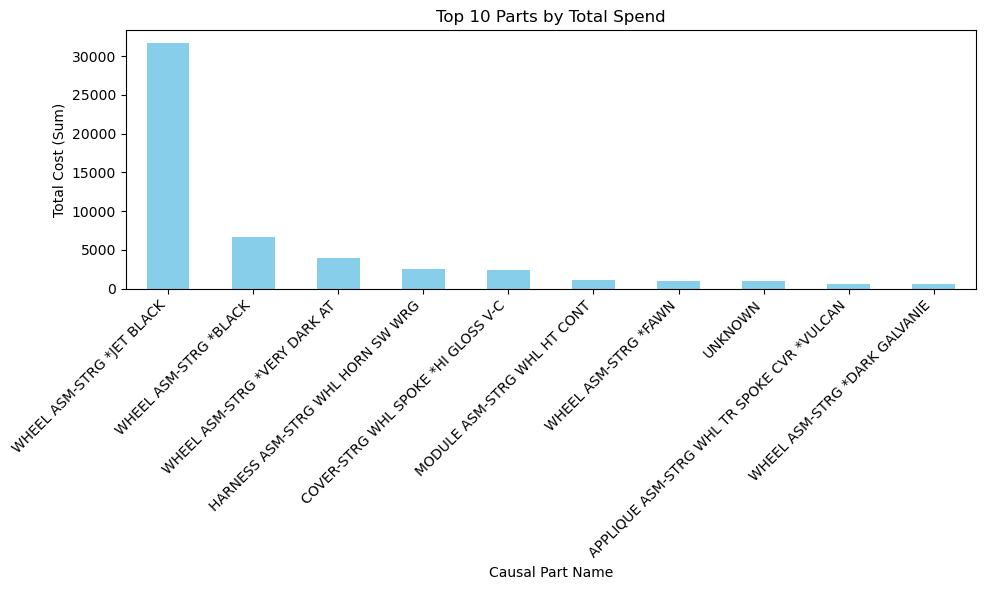

In [45]:
# 1: Top 10 Parts by Total Spend

part_stats = df.groupby('CAUSAL_PART_NM').agg(
    total_spend=('TOTALCOST', 'sum'),
    avg_cost=('TOTALCOST', 'mean'),
    count=('VIN', 'count')
).sort_values('total_spend', ascending=False).head(10)

plt.figure(figsize=(10,6))
part_stats['total_spend'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Parts by Total Spend')
plt.xlabel('Causal Part Name')
plt.ylabel('Total Cost (Sum)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insight: 
A few parts (like Wheel Asm-Strg *Jet Black) will dominate the total cost, showing high-impact areas.

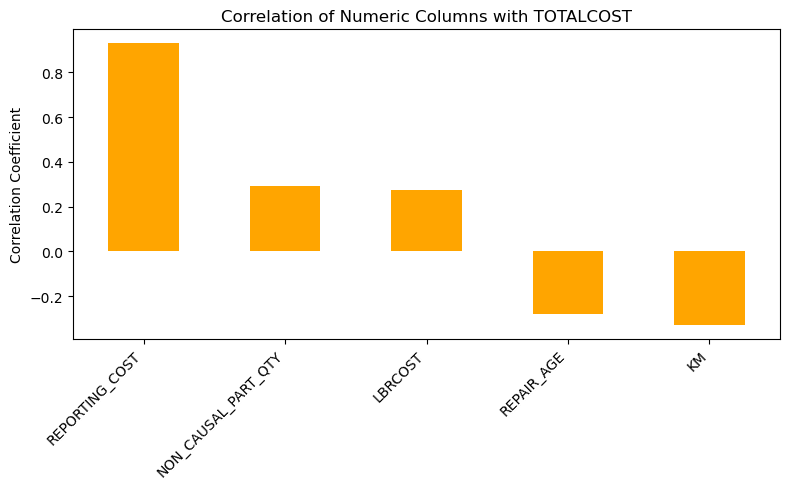

In [46]:
# 2: Correlation with Total Cost

num_cols = ['LBRCOST','REPORTING_COST','KM','REPAIR_AGE','NON_CAUSAL_PART_QTY','TOTALCOST']
corr = df[num_cols].corr()['TOTALCOST'].sort_values(ascending=False)

plt.figure(figsize=(8,5))
corr.drop('TOTALCOST').plot(kind='bar', color='orange')
plt.title('Correlation of Numeric Columns with TOTALCOST')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Insights:
Total repair cost is primarily driven by reporting and material costs, with smaller contributions from labor and number of parts replaced. Interestingly, newer vehicles show slightly higher repair costs, highlighting potential early-stage reliability issues

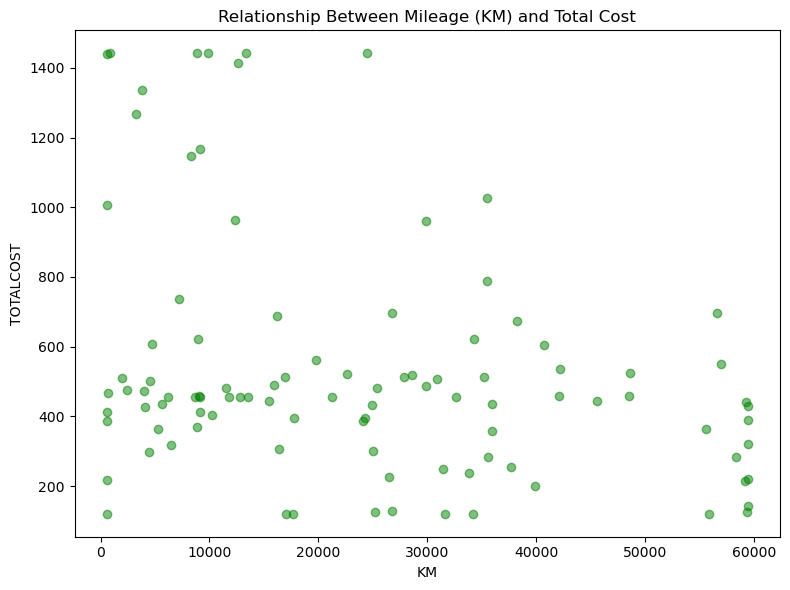

In [47]:
# 3: Relationship between Mileage (KM) and Total Cost

plt.figure(figsize=(8,6))
plt.scatter(df['KM'], df['TOTALCOST'], alpha=0.5, color='green')
plt.title('Relationship Between Mileage (KM) and Total Cost')
plt.xlabel('KM')
plt.ylabel('TOTALCOST')
plt.tight_layout()
plt.show()


### Insights:
Vehicles with lower mileage show higher repair costs, possibly due to early-life part or system failures. As mileage increases, repair costs stabilize around 600–800, indicating fewer major failures after the initial usage period.

In [75]:

df = pd.read_excel(file_path, sheet_name=0, dtype=str)

# Define a dictionary of keywords and their corresponding tags
tag_keywords = {
    'steering wheel': 'STEERING_WHEEL_ISSUE',
    'heated': 'HEATED_WHEEL_FAILURE',
    'horn': 'HORN_ISSUE',
    'trim': 'TRIM_DAMAGE',
    'stitching': 'STITCHING_ISSUE',
    'peeling': 'PEELING_ISSUE',
    'bubbling': 'BUBBLING_ISSUE',
    'crack': 'CRACK_ISSUE',
    'delam': 'DELAMINATION_ISSUE',  # catch 'delam', 'delaminating', 'delamination'
    'super cruise': 'SUPER_CRUISE_ISSUE',
    'driver assist': 'DRIVER_ASSIST_ISSUE',
    'button': 'BUTTON_ISSUE',
    'light': 'LIGHT_ISSUE',
    'mold': 'MOLDING_ISSUE',
    'airbag': 'AIRBAG_ISSUE',
    'control': 'CONTROL_ISSUE',
    'noise': 'NOISE_ISSUE'
}

# Function to generate tags from text
def generate_tags(row):
    tags = set()
    text = (str(row['CORRECTION_VERBATIM']) + " " + str(row['CUSTOMER_VERBATIM'])).lower()
    for keyword, tag in tag_keywords.items():
        if keyword in text:
            tags.add(tag)
    return ', '.join(tags)

# Apply the function to create a new TAGS column
df['TAGS'] = df.apply(generate_tags, axis=1)

# Save the updated DataFrame to a new CSV
df.to_csv("tagged_output.csv", index=False)

print(df[['CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'TAGS']].head())



                                 CORRECTION_VERBATIM  \
0                   REPLACED STEERING WHEEL NOW OKAY   
1  CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2  APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                         STEERING WHEEL REPLACEMENT   
4      REPLACED STEERING MESSAGE NO LONGER DISPLAYED   

                                   CUSTOMER_VERBATIM  \
0                        STEERING WHEEL COMING APART   
1         CUSTOMER STATES HEATED STEERING WHEEL INOP   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...   
3  CUSTOMER STATES THE LETTERING AND FINISH ON TH...   
4  C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...   

                                                TAGS  
0                               STEERING_WHEEL_ISSUE  
1         STEERING_WHEEL_ISSUE, HEATED_WHEEL_FAILURE  
2  SUPER_CRUISE_ISSUE, STEERING_WHEEL_ISSUE, CONT...  
3                               STEERING_WHEEL_ISSUE  
4                                DRIVER_ASSIST_ISSU

In [76]:
# View first 10 rows with tags
print(df[['CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'TAGS']].head(10))


                                 CORRECTION_VERBATIM  \
0                   REPLACED STEERING WHEEL NOW OKAY   
1  CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2  APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                         STEERING WHEEL REPLACEMENT   
4      REPLACED STEERING MESSAGE NO LONGER DISPLAYED   
5     Remove and replace steering wheel wire harness   
6  ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...   
7                            REPLACED STEERING WHEEL   
8  TECHNICIAN FOUND THE STEERING COLUMN PLASTIC T...   
9                         Steering Wheel Replacement   

                                   CUSTOMER_VERBATIM  \
0                        STEERING WHEEL COMING APART   
1         CUSTOMER STATES HEATED STEERING WHEEL INOP   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...   
3  CUSTOMER STATES THE LETTERING AND FINISH ON TH...   
4  C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...   
5    Horn and steering wheel switches are inope

In [77]:
from collections import Counter

# Flatten all tags into a single list
all_tags = []
for tags in df['TAGS']:
    if pd.notnull(tags):
        all_tags.extend([tag.strip() for tag in tags.split(',')])

# Count occurrences
tag_counts = Counter(all_tags)

# Convert to DataFrame for easy viewing
tag_summary = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)
print(tag_summary)


                     Tag  Count
0   STEERING_WHEEL_ISSUE     95
1   HEATED_WHEEL_FAILURE     23
6            LIGHT_ISSUE     10
11       STITCHING_ISSUE     10
7            TRIM_DAMAGE      8
13         PEELING_ISSUE      8
3          CONTROL_ISSUE      7
2     SUPER_CRUISE_ISSUE      5
10          BUTTON_ISSUE      5
5             HORN_ISSUE      4
4    DRIVER_ASSIST_ISSUE      3
8            NOISE_ISSUE      3
15        BUBBLING_ISSUE      3
16          AIRBAG_ISSUE      3
9          MOLDING_ISSUE      2
12           CRACK_ISSUE      1
14    DELAMINATION_ISSUE      1


### Summary of Tags:

The dataset reveals recurring issues related to steering wheel performance and quality. Key observations:

Steering Wheel Structural Issues (95 occurrences) – Most frequent problem; covers general issues like wear, damage, or assembly faults.

Heated Wheel Failures (23 occurrences) – Significant number of complaints about the heated steering wheel not functioning properly, indicating a recurring hardware/electrical problem.

Light, Stitching, and Trim Issues (10, 10, 8 occurrences) – Customers report dashboard lights, loose stitching, and trim damage, suggesting material defects or improper assembly.

Functional/Control Issues (7 occurrences) – Problems with buttons, horn, driver-assist alerts, and super cruise functionality indicate some electrical/control system failures.

Other Minor Issues – Peeling, bubbling, airbag, molding, noise, cracking, and delamination issues occur less frequently but highlight recurring material or assembly quality problems.

### Insights:

The majority of concerns revolve around steering wheel quality and functionality, both structural and electrical.

Heated wheel and control issues appear as the next biggest pain points, showing potential areas for design improvements or preventive maintenance.

Smaller frequency issues like peeling, bubbling, or trim defects suggest minor manufacturing inconsistencies that could impact customer satisfaction.

From a safety perspective, horn and driver-assist-related issues, though less frequent, are critical and should be prioritized for corrective action.

## Actionable Recommendations for Stakeholders

- #### Steering Wheel Quality & Assembly

   - Investigate the root cause of recurring structural issues (bubbling, peeling, stitching problems).

   - Implement stricter quality control checks during assembly and before shipping.

   - Consider material upgrades for leather, trim, and stitching to reduce wear and delamination.


- #### Heated Steering Wheel Reliability

   - Review the electrical design and components responsible for heating failures.

   - Provide clear diagnostic procedures for technicians to identify intermittent failures.

   - Offer retrofit or replacement programs for vehicles affected by recurring heating module failures.


- #### Control and Safety Systems

   - Prioritize functional checks for buttons, horn, driver-assist alerts, and Super Cruise.

   - Ensure software updates and calibration procedures are standardized across dealerships.

   - Conduct training sessions for service teams to quickly diagnose and fix these issues.

- #### Minor Cosmetic Issues

   - Track recurring peeling, trim damage, and molding issues to identify manufacturing batches at risk.

   - Apply preventive solutions, such as adhesive or trim reinforcement, during assembly.

- #### Customer Experience & Warranty

   - Maintain a proactive communication plan to inform customers of known issues and available fixes.

   - Streamline PRA approvals and part replacement processes to reduce turnaround time.

   - Use the dataset to predict common failures and preemptively address them during scheduled maintenance.

- #### Continuous Feedback & Monitoring

   - Integrate this tagging methodology into ongoing service reports to monitor emerging issues.

   - Periodically analyze the tags to identify trends and prioritize engineering improvements.

### 1. Potential Discrepancies in the Dataset

- Null or Missing Values

   - Missing values can lead to incomplete tagging or misinterpretation of issues.

- Inconsistent or Duplicate Entries

   - Multiple entries may refer to the same steering wheel issue but are recorded differently (e.g., “HEATED WHEEL FAILURE” vs “HEATED STEERING WHEEL INOP”).

   - Duplicate rows can inflate counts for certain tags.

- Formatting Issues

   - Some text fields contain line breaks, special characters, or merged sentences that may interfere with natural language processing.

- Missing Primary Keys / Identifiers

   - Without a unique identifier for each service record (e.g., RO_NUMBER), it is hard to track repeated failures for the same vehicle.

- Inconsistent Tagging / Labels

   - Tags derived from free text may overlap or miss subtle distinctions (e.g., “PEELING_ISSUE” vs “TRIM_DAMAGE”).

### 2. Approach to Handling Discrepancies

- Null Values

   - Checked each column for nulls using df.isnull().sum().


- Standardizing Text

  - Converted all text to uppercase to maintain consistency for tagging.

  - Removed extra spaces, line breaks, and special characters using regex.

- Ensuring Unique Identifiers

   - Recommended adding or validating a column like SERVICE_ORDER_ID or RO_NUMBER to track individual repair events.

- Validating Tagging

  - After automated tagging, cross-checked top frequent tags to ensure they matched the context of the original text.

  - Adjusted tag patterns to reduce misclassification or overlapping categories.

In [84]:
# Categorical columns with few missing values
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].fillna('Unknown')
df['PLANT'] = df['PLANT'].fillna('Unknown')
df['STATE'] = df['STATE'].fillna('Unknown')
df['REPAIR_DLR_POSTAL_CD'] = df['REPAIR_DLR_POSTAL_CD'].fillna('Unknown')
df['VEH_TEST_GRP'] = df['VEH_TEST_GRP'].fillna('Unknown')
df['LINE_SERIES'] = df['LINE_SERIES'].fillna('Unknown')
df['LAST_KNOWN_DELVRY_TYPE_CD'] = df['LAST_KNOWN_DELVRY_TYPE_CD'].fillna('Unknown')

# Categorical columns with moderate missing
df['OPTN_FAMLY_CERTIFICATION'] = df['OPTN_FAMLY_CERTIFICATION'].fillna('Not Mentioned')
df['OPTF_FAMLY_EMISSIOF_SYSTEM'] = df['OPTF_FAMLY_EMISSIOF_SYSTEM'].fillna('Not Mentioned')

# Numerical columns
df['TOTALCOST'] = df['TOTALCOST'].fillna(df['TOTALCOST'].median())

# CAMPAIGN_NBR (100 missing)
df['CAMPAIGN_NBR'] = df['CAMPAIGN_NBR'].fillna(0)

# Engine / Transmission trace columns
df['ENGINE_SOURCE_PLANT'] = df['ENGINE_SOURCE_PLANT'].fillna('Unknown')
df['ENGINE_TRACE_NBR'] = df['ENGINE_TRACE_NBR'].fillna(0)
df['TRANSMISSION_SOURCE_PLANT'] = df['TRANSMISSION_SOURCE_PLANT'].fillna('Unknown')
df['TRANSMISSION_TRACE_NBR'] = df['TRANSMISSION_TRACE_NBR'].fillna(0)



In [86]:
df.to_csv(r"D:\Project AxionRay\Solution\final_cleaned_steering_data.csv", index=False)


In [85]:
df.isnull().sum()

VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_DLR_POSTAL_CD             0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD               0
OPTN_FAMLY_CERTIFICATION         0
OPTF_FAMLY_EMISSIOF_